In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [3]:
file_path = '/content/heart_failure_clinical_records_dataset (1).csv'
data = pd.read_csv(file_path)

In [4]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
data.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [6]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [7]:
data.shape

(299, 13)

In [8]:
print(data.isnull().sum())

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


In [9]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [10]:
numerical_columns=data.select_dtypes(include=['number'])
print(numerical_columns.head())

    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2       

In [11]:
X = data.drop('DEATH_EVENT', axis=1)
y = data['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)
log_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test_scaled)[:, 1])

In [14]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

In [15]:
# XGBoost
xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
xgb_auc = roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1])

In [16]:
print("\n--- Logistic Regression ---\n", classification_report(y_test, y_pred_log))
print("\n--- Random Forest ---\n", classification_report(y_test, y_pred_rf))
print("\n--- XGBoost ---\n", classification_report(y_test, y_pred_xgb))


--- Logistic Regression ---
               precision    recall  f1-score   support

           0       0.83      0.93      0.87        41
           1       0.79      0.58      0.67        19

    accuracy                           0.82        60
   macro avg       0.81      0.75      0.77        60
weighted avg       0.81      0.82      0.81        60


--- Random Forest ---
               precision    recall  f1-score   support

           0       0.84      0.93      0.88        41
           1       0.80      0.63      0.71        19

    accuracy                           0.83        60
   macro avg       0.82      0.78      0.79        60
weighted avg       0.83      0.83      0.83        60


--- XGBoost ---
               precision    recall  f1-score   support

           0       0.83      0.95      0.89        41
           1       0.85      0.58      0.69        19

    accuracy                           0.83        60
   macro avg       0.84      0.77      0.79        60
we

In [17]:
model = Sequential([
    Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=100, batch_size=16, verbose=1, validation_split=0.1)

y_pred_dl_prob = model.predict(X_test_scaled)
y_pred_dl = (y_pred_dl_prob > 0.5).astype("int32")
dl_auc = roc_auc_score(y_test, y_pred_dl_prob)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5129 - loss: 0.7531 - val_accuracy: 0.7917 - val_loss: 0.6073
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6965 - loss: 0.6068 - val_accuracy: 0.7500 - val_loss: 0.5543
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6821 - loss: 0.6007 - val_accuracy: 0.7500 - val_loss: 0.5252
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7968 - loss: 0.5271 - val_accuracy: 0.7500 - val_loss: 0.4971
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7635 - loss: 0.4860 - val_accuracy: 0.7500 - val_loss: 0.4743
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7456 - loss: 0.5366 - val_accuracy: 0.7917 - val_loss: 0.4514
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8107 - loss: 0.4390 - val_accuracy: 0.7917 - val_loss: 0.4385
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8246 - loss: 0.4412 - val_accuracy: 0.7917 - val_loss:

In [18]:
print("\n--- Deep Learning ---\n", classification_report(y_test, y_pred_dl))


--- Deep Learning ---
               precision    recall  f1-score   support

           0       0.77      0.83      0.80        41
           1       0.56      0.47      0.51        19

    accuracy                           0.72        60
   macro avg       0.67      0.65      0.66        60
weighted avg       0.71      0.72      0.71        60



In [19]:
print("\n--- Logistic Regression ---\n", classification_report(y_test, y_pred_log))
print("\n--- Random Forest ---\n", classification_report(y_test, y_pred_rf))
print("\n--- XGBoost ---\n", classification_report(y_test, y_pred_xgb))
print("\n--- Deep Learning ---\n", classification_report(y_test, y_pred_dl))

print("\nAUC Scores:")
print(f"Logistic Regression AUC: {log_auc:.4f}")
print(f"Random Forest AUC: {rf_auc:.4f}")
print(f"XGBoost AUC: {xgb_auc:.4f}")
print(f"Deep Learning AUC: {dl_auc:.4f}")



--- Logistic Regression ---
               precision    recall  f1-score   support

           0       0.83      0.93      0.87        41
           1       0.79      0.58      0.67        19

    accuracy                           0.82        60
   macro avg       0.81      0.75      0.77        60
weighted avg       0.81      0.82      0.81        60


--- Random Forest ---
               precision    recall  f1-score   support

           0       0.84      0.93      0.88        41
           1       0.80      0.63      0.71        19

    accuracy                           0.83        60
   macro avg       0.82      0.78      0.79        60
weighted avg       0.83      0.83      0.83        60


--- XGBoost ---
               precision    recall  f1-score   support

           0       0.83      0.95      0.89        41
           1       0.85      0.58      0.69        19

    accuracy                           0.83        60
   macro avg       0.84      0.77      0.79        60
we

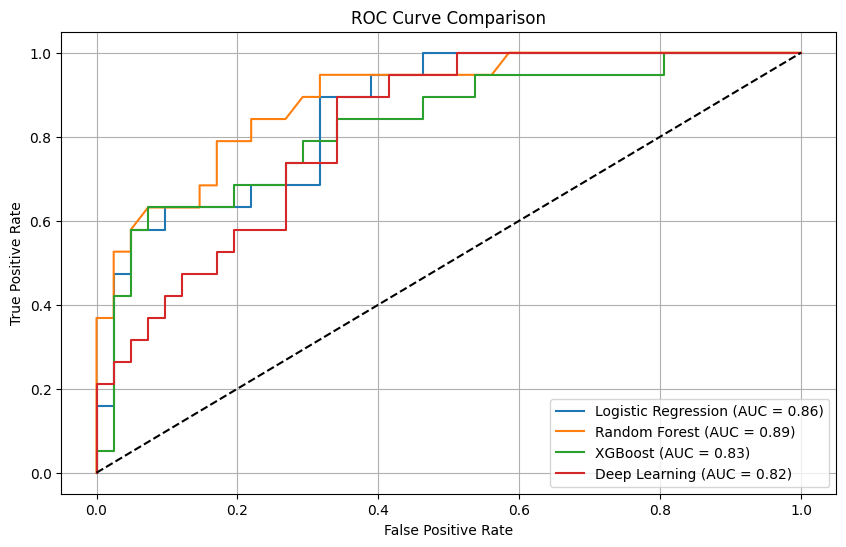

In [20]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr_lr, tpr_lr, _ = roc_curve(y_test, log_reg.predict_proba(X_test_scaled)[:, 1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb.predict_proba(X_test)[:, 1])
fpr_dl, tpr_dl, _ = roc_curve(y_test, y_pred_dl_prob)

plt.figure(figsize=(10,6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {log_auc:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {rf_auc:.2f})")
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {xgb_auc:.2f})")
plt.plot(fpr_dl, tpr_dl, label=f"Deep Learning (AUC = {dl_auc:.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()

In [21]:
import gzip
import pickle

with gzip.open("final_model.pkl","wb") as f:
  pickle.dump(rf,f)

In [39]:
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [37]:
import numpy as np
import pandas as pd

new_input_dict = {
    'age': 60.0,
    'anaemia': 0,
    'creatinine_phosphokinase': 200,
    'diabetes': 0,
    'ejection_fraction': 40,
    'high_blood_pressure': 0,
    'platelets': 250000.0,
    'serum_creatinine': 1.0,
    'serum_sodium': 135,
    'sex': 1,
    'smoking': 0,
    'time': 100
}


new_input_df = pd.DataFrame([new_input_dict])
new_input_df = new_input_df[X_train.columns]  # Force same column order
new_input_scaled = scaler.transform(new_input_df)
predicted = rf.predict(new_input_scaled)
predicted_probs = rf.predict_proba(new_input_scaled)

#output
print(f"Predicted DEATH_EVENT (0: No, 1: Yes): {predicted[0]}")
print(f"Predicted probabilities (0: No, 1: Yes): {predicted_probs[0]}")


Predicted DEATH_EVENT (0: No, 1: Yes): 1
Predicted probabilities (0: No, 1: Yes): [0.26 0.74]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
